<a href="https://colab.research.google.com/github/maverick98/Coursera/blob/master/machine_learning_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**We have uploaded the csv file from https://drive.google.com/file/d/1YdQ8Uvc8KYy_u8pNQGoNHaaFH7wEBCCu/view to our google drive. Loading from there by mounting the drive here**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/Assignment-1_Set-8_Dataset.csv /content

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [ ]:
def read_data():
    df = pd.read_csv("/content/Assignment-1_Set-8_Dataset.csv")
    return df

In [ ]:
def describe(df):
    print(df.head())
    print(df.describe())
    print(df.shape)
    print(df.columns)

In [ ]:
df = read_data()
describe(df)

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean     

In [ ]:
def show_feature_distributions(df):
    df.hist(bins=20, figsize=(10,5), grid=False)
    plt.suptitle("Feature Distribution", fontsize=16)
    plt.show()

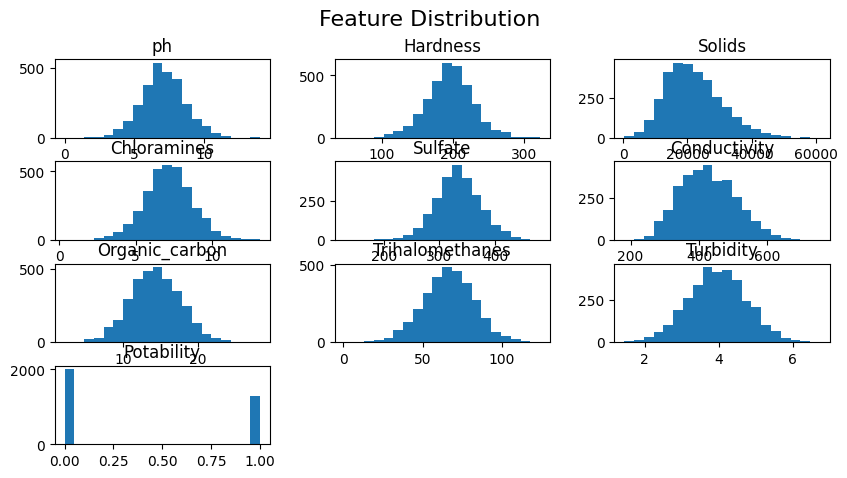

In [ ]:
show_feature_distributions(df)

In [ ]:

# c. Class imbalance visualization
def plot_class_distribution(df):
    sns.countplot(x='Potability', data=df)
    plt.title('Class Distribution')
    plt.xlabel('Potability')
    plt.ylabel('Count')
    plt.show()

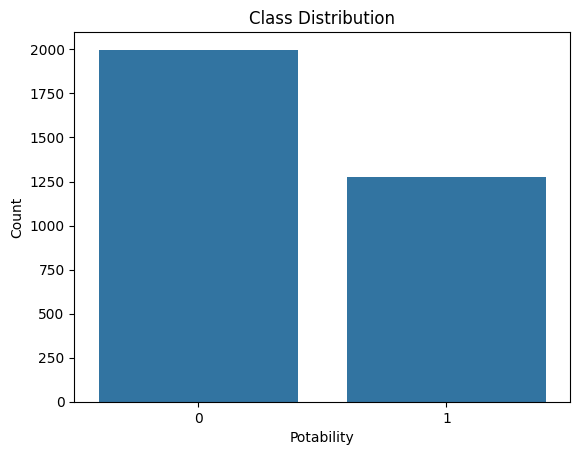

In [ ]:
plot_class_distribution(df)

In [ ]:
def plot_box_plots(df):
    for col in df.columns:
        plt.figure(figsize=(7,5))
        sns.boxplot(data=df[col],orient='H')
        plt.show


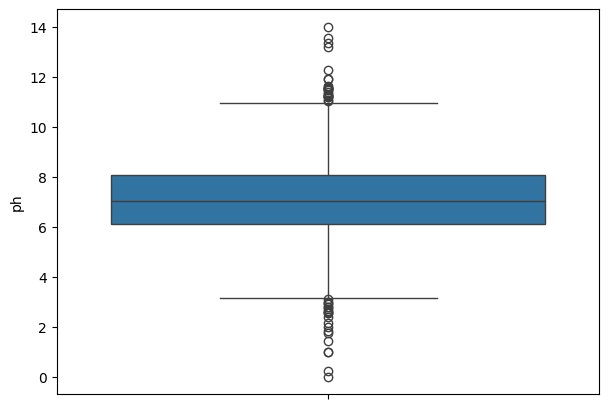

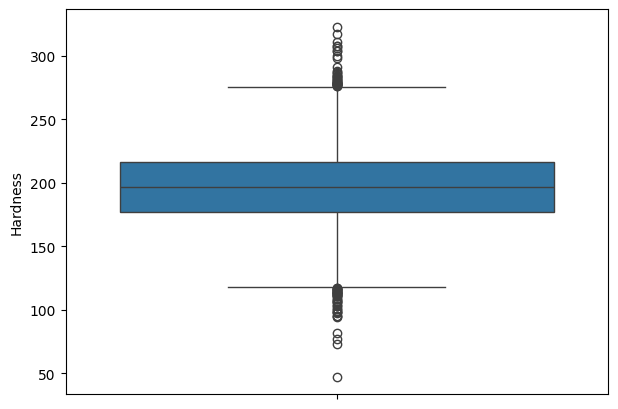

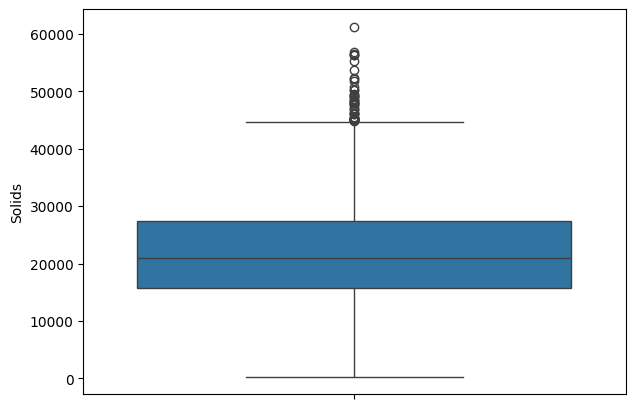

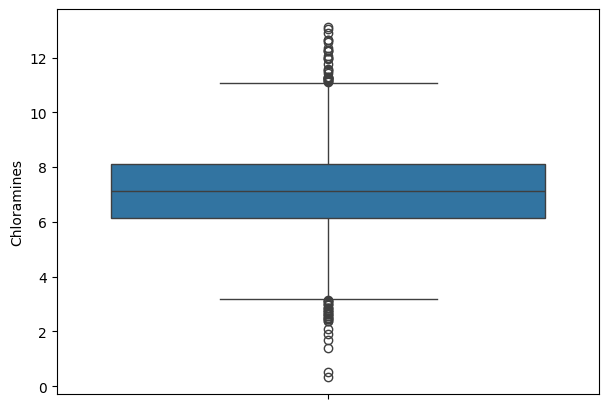

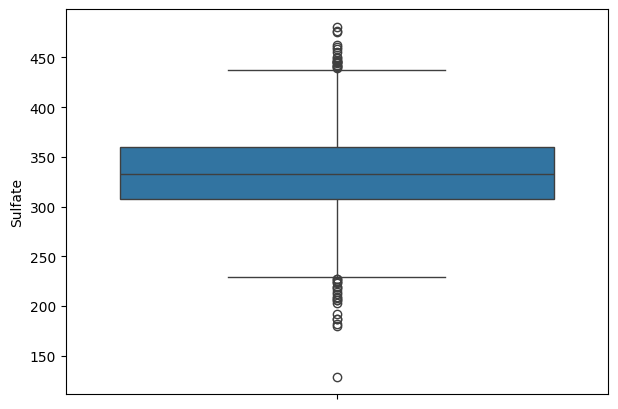

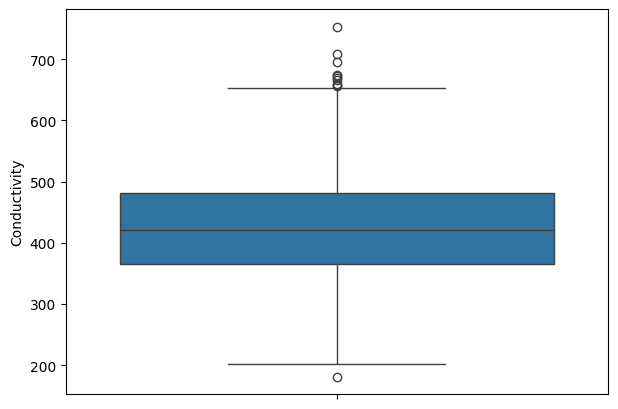

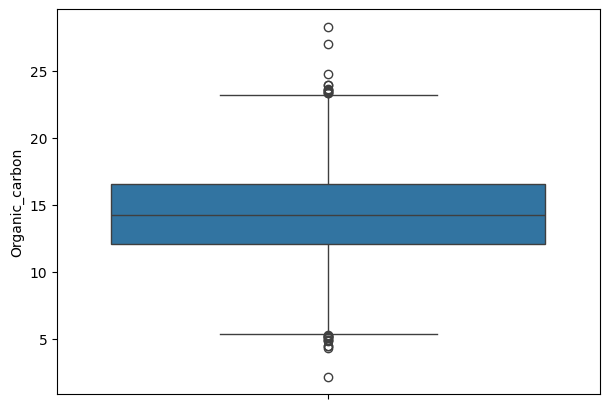

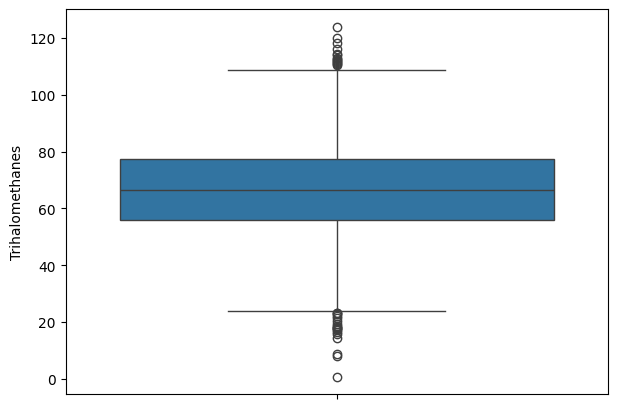

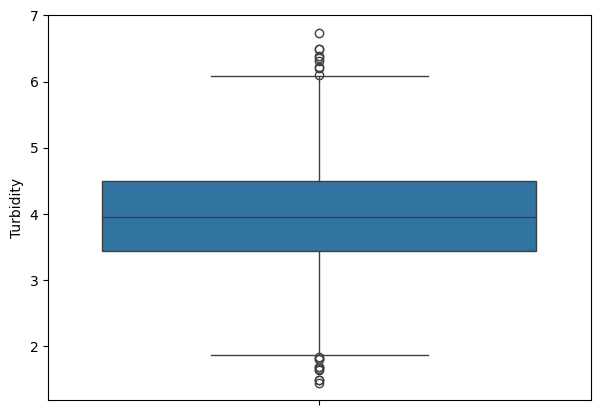

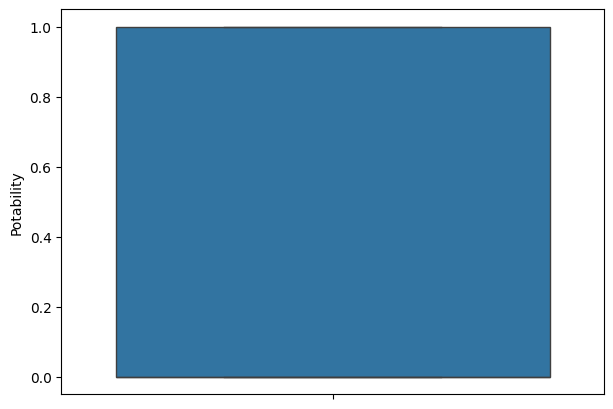

In [ ]:
plot_box_plots(df)

In [ ]:
def get_feature_cols(df):
    feature_cols=[]
    for col in df.columns:
        if col != 'Potability':
            feature_cols.append(col)
    print(feature_cols)
    return feature_cols


def handle_outliers(df, colm):
    '''Change the values of outlier to upper and lower whisker values '''
    q1 = df.describe()[colm].loc["25%"]
    q3 = df.describe()[colm].loc["75%"]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in range(len(df)):
        if df.loc[i,colm] > upper_bound:
            df.loc[i,colm]= upper_bound
        if df.loc[i,colm] < lower_bound:
            df.loc[i,colm]= lower_bound
    return df
def treat_outliers(df):
    df_outlier_treated = df.copy()
    feature_cols=get_feature_cols(df)
    for col in feature_cols:
        df_outlier_treated = handle_outliers(df_outlier_treated, col)
    return df_outlier_treated


In [ ]:
df_outlier_treated=treat_outliers(df)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


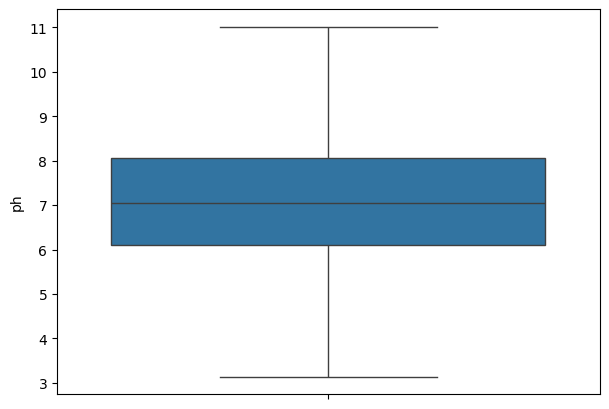

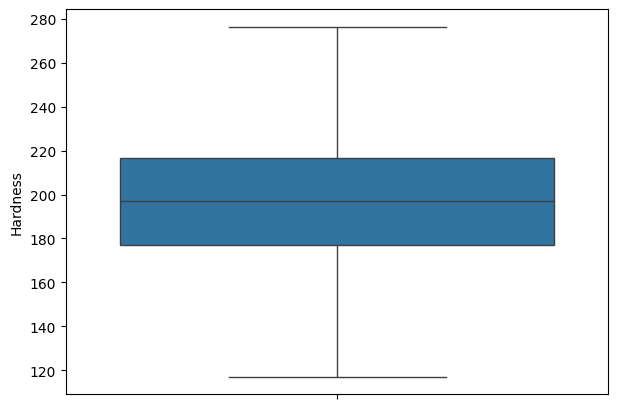

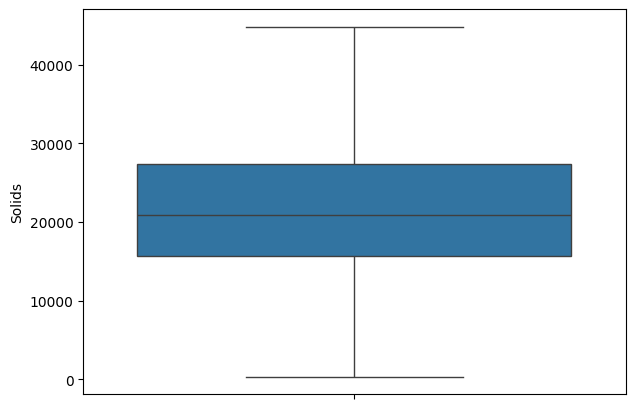

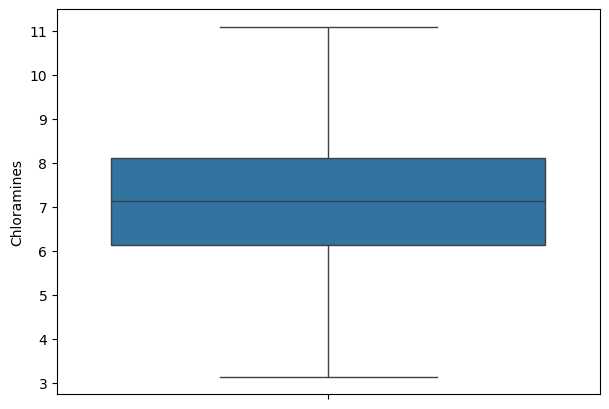

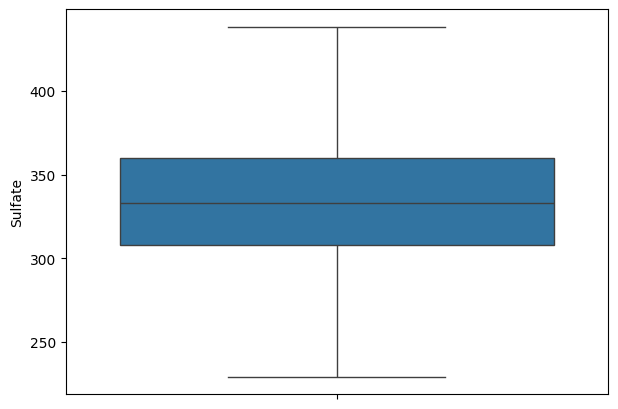

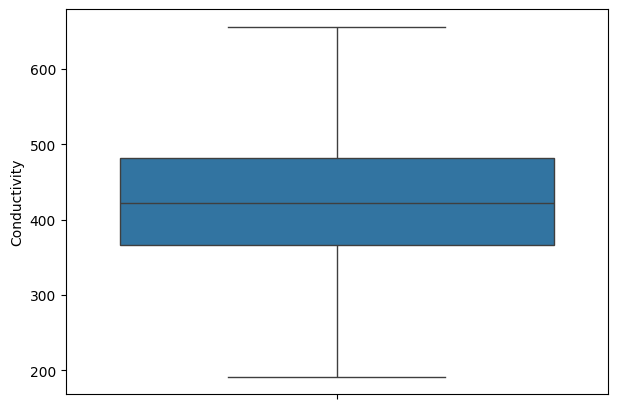

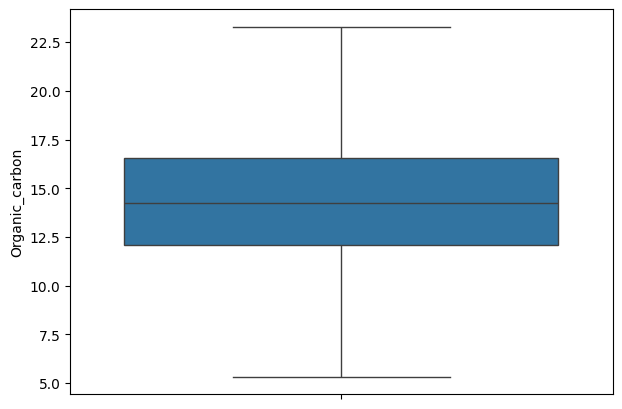

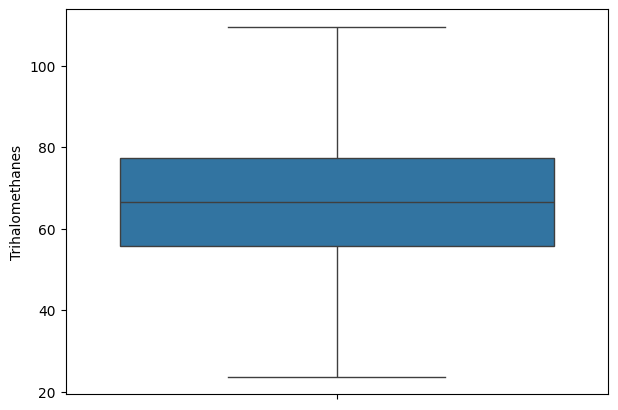

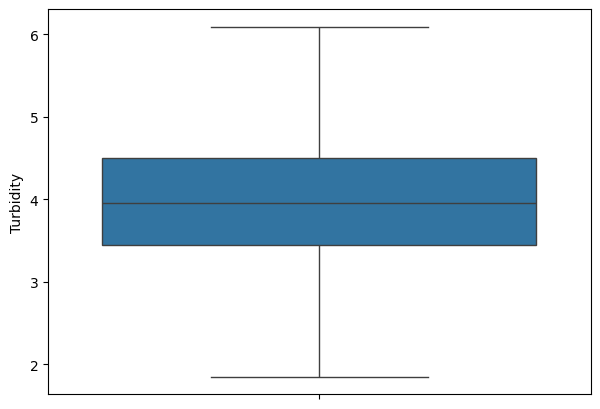

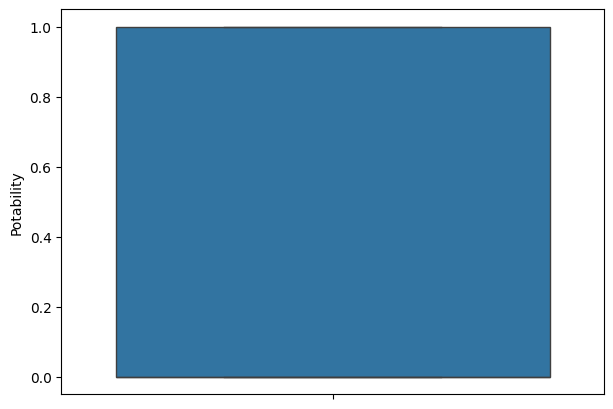

In [ ]:
plot_box_plots(df_outlier_treated)

In [ ]:
describe(df_outlier_treated)

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean     

In [ ]:
def plot_corr(df):
    # d. Correlational analysis and visualization
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

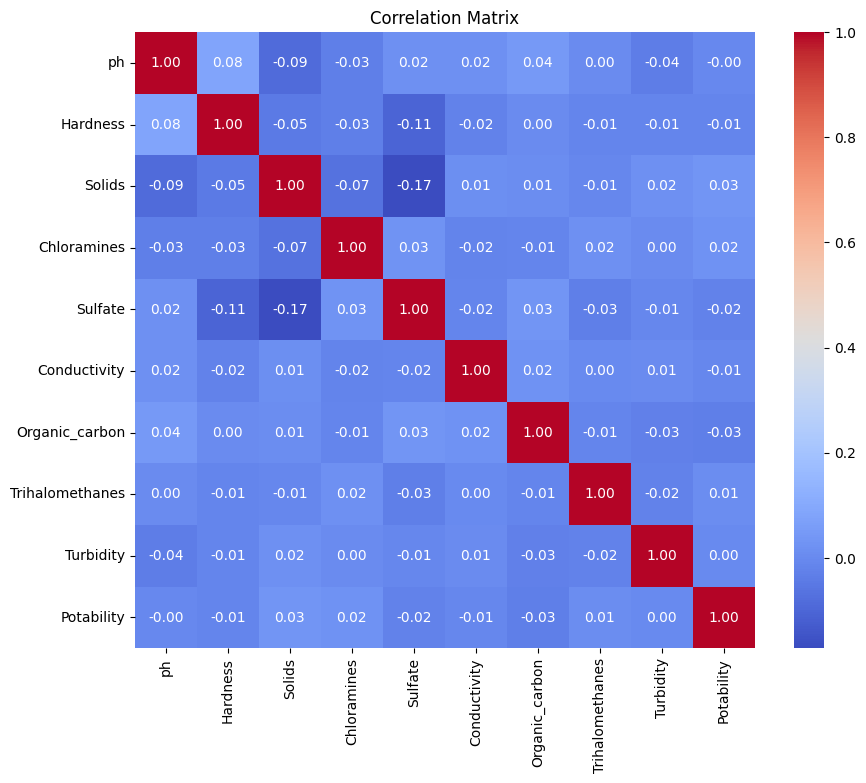

In [ ]:
plot_corr(df)

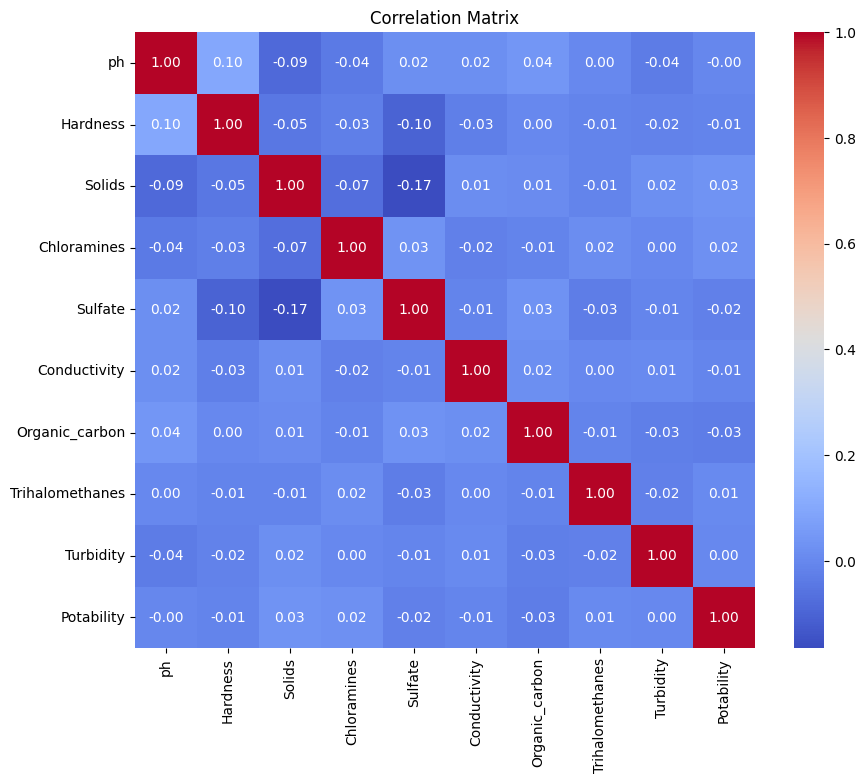

In [ ]:
plot_corr(df_outlier_treated)

In [ ]:




# Correlation analysis will help in identifying highly correlated features. Highly correlated features can be redundant for the model and may affect model performance. Thus, it may have an effect on feature selection.


In [ ]:
# a. Pre-processing steps
# Checking for missing values
def check_null(df):
    print(df.isnull().sum())

In [ ]:
check_null(df)
check_null(df_outlier_treated)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
def impute_data(df):
    # Handling missing values using SimpleImputer
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df_imputed


In [ ]:
df_outlier_treated_imputed=impute_data(df_outlier_treated)
check_null(df_outlier_treated_imputed)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
describe(df_outlier_treated_imputed)

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.036752  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.073546    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.073546    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135         0.0  
1       15.180013        56.329076   4.500656         0.0  
2       16.868637        66.420093   3.055934         0.0  
3       18.436524       100.341674   4.628771         0.0  
4       11.558279        31.997993   4.075075         0.0  
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean     

In [ ]:
def extract_X_y(df):
    # b. Feature Engineering
    # Splitting features and target variable
    X = df_outlier_treated_imputed.drop('Potability', axis=1)
    y = df_outlier_treated_imputed['Potability']

    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test
def scale_feature(X_train,X_test):
    # Feature scaling using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled,X_test_scaled


In [ ]:
X_train, X_test, y_train, y_test=extract_X_y(df_outlier_treated_imputed)
X_train_scaled,X_test_scaled=scale_feature(X_train, X_test)

In [101]:
def build_vanilla_logistic_model( ):
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train_scaled, y_train)
    return logistic_model
def build_balanced_logistic_model():
    logistic_model = LogisticRegression(solver='newton-cg', class_weight='balanced')
    logistic_model.fit(X_train_scaled, y_train )
    return logistic_model
def build_decision_tree_logistic_model( ):
    decision_tree_model = DecisionTreeClassifier()
    decision_tree_model.fit(X_train_scaled, y_train)
    return decision_tree_model


In [107]:
logistic_model=build_vanilla_logistic_model()
balanced_logistic_model=build_balanced_logistic_model()
decision_tree_model=build_decision_tree_logistic_model()





In [115]:
def conf_matrix(y_test, y_pred):
    con_mat = confusion_matrix(y_test, y_pred)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

In [116]:
def model_prediction(model,model_desc):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(model_desc)
    conf_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print(classification_report(y_test, y_pred))

Logistic Model Performance
Accuracy: 0.6280487804878049
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

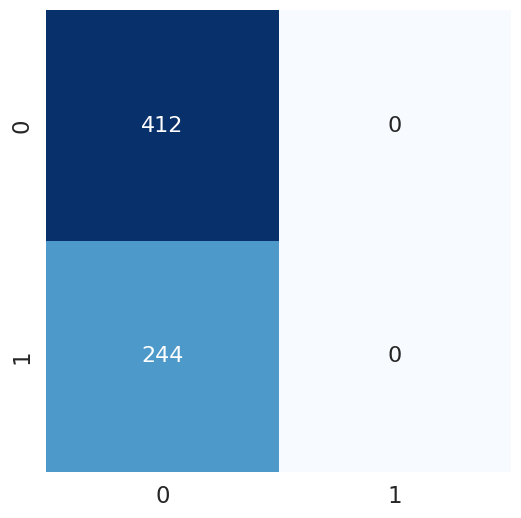

In [119]:
model_prediction(logistic_model,'Logistic Model Performance')

Logistic Model with class weights Performance
Accuracy: 0.5076219512195121
Precision: 0.3753943217665615
Recall: 0.48770491803278687
F1 Score: 0.4242424242424242
ROC AUC Score: 0.5035611968804711
              precision    recall  f1-score   support

         0.0       0.63      0.52      0.57       412
         1.0       0.38      0.49      0.42       244

    accuracy                           0.51       656
   macro avg       0.50      0.50      0.50       656
weighted avg       0.54      0.51      0.52       656



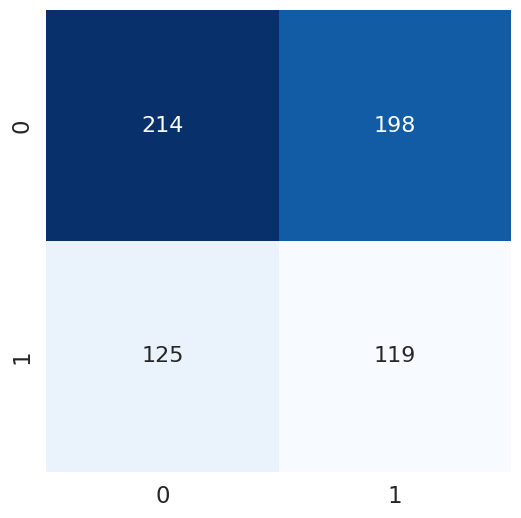

In [120]:
model_prediction(balanced_logistic_model,'Logistic Model with class weights Performance')

Decision Tree Model performance
Accuracy: 0.5701219512195121
Precision: 0.4306569343065693
Recall: 0.48360655737704916
F1 Score: 0.4555984555984555
ROC AUC Score: 0.55248289033901
              precision    recall  f1-score   support

         0.0       0.67      0.62      0.64       412
         1.0       0.43      0.48      0.46       244

    accuracy                           0.57       656
   macro avg       0.55      0.55      0.55       656
weighted avg       0.58      0.57      0.57       656



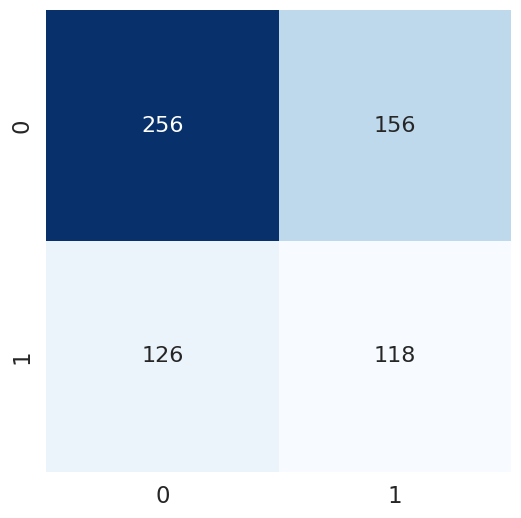

In [122]:
model_prediction(decision_tree_model,'Decision Tree Model performance')